In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def hough_transformation(image):
    image = cv2.imread(image,0)
    object_edges = cv2.Canny(image, 10, 200)
    edge_points = np.nonzero(object_edges)

    if len(edge_points[0]) > 0:
        shape = image.shape + (30,)
        accumulator_matrix = np.zeros(shape)

        #voting
        for i in range(len(edge_points[0])): #for each edge pixel
            for radius in range(10, 30): #for each possible radius (values to be determined later)
                for k in range(360): #possible gradient (angle)
                    a = int(edge_points[0][i] - radius * np.cos(np.radians(k)))
                    b = int(edge_points[1][i] + radius * np.sin(np.radians(k)))

                    accumulator_matrix[a, b, radius] += 1
        
        #finding local maxima
        votes = np.sum(accumulator_matrix, axis = 2)
        print(np.nonzero(votes))
        

        plt.imshow(accumulator_matrix[:,:, 17])
        plt.show()
        


(array([  7,   7,   7, ..., 207, 207, 207], dtype=int64), array([114, 115, 116, ..., 110, 111, 112], dtype=int64))


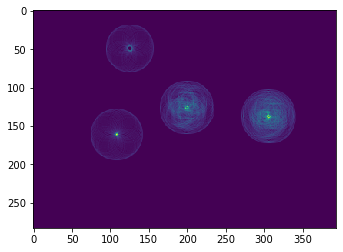

In [14]:
hough_transformation('test_image4.jpg')